# K-Means:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(24)

In [3]:
plt.style.use('ggplot')

In [4]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [7, 5],
              [10, 3],
              [2, 8],
              [2, 5],
              [1,5],
              [4,2]])

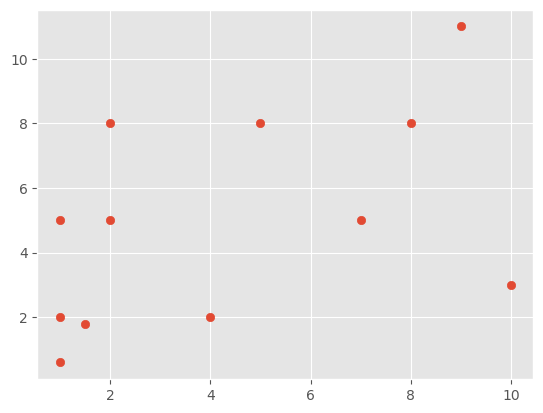

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
class Kmeans:
    
    def __init__(self, k = 2, max_iterations=100):
        if k < 2:
            k = 2
            
        self.k = k
        self.max_iterations = max_iterations
        self.colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
                       '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    @staticmethod
    def get_distances(point, centers):
        dist = 1e9
        for i in range(len(centers)):
            distance = np.sqrt((point[0]-centers[i][0])**2 + (point[1]-centers[i][1])**2)
            if dist > distance:
                dist = distance
                cluster_number = i
        return cluster_number
    
    @staticmethod
    def plot_data(centers, data, color):
        if len(data) > 0:
            data = np.array(data)
            plt.scatter(data[:,0], data[:,1], color=color)
        plt.scatter(centers[0], centers[1], marker="x", color='k')
    
    @staticmethod
    def update_centers(data):
        data = np.array(data)
        return np.mean(data, axis=0)
    
    def fit(self, data):
        self.centroids = []
        self.old_centroids = []
        random_numbers = np.random.choice(a=len(data), size=self.k, replace=False)
        
        for i in range(self.k):
            self.centroids.append(data[random_numbers[i]])
            self.old_centroids = self.centroids.copy()
            
        for _ in range(self.max_iterations):
            self.classification = {}
            
            for k_number in range(self.k):
                self.classification[k_number] = []
                
            for i in data:
                number = self.get_distances(i, self.centroids)
                self.classification[number].append(i)
            
            for i in range(len(self.centroids)):
                self.plot_data(self.centroids[i], self.classification[i], self.colors[i])
            plt.show()
            
            for i in range(len(self.centroids)):
                self.centroids[i] = self.update_centers(self.classification[i])
            
            old_centers = np.array(self.old_centroids)
            new_centers = np.array(self.centroids)
            comparison = old_centers - new_centers
            are_equal = comparison == 0
            if are_equal.all():
                print('Break')
                break
                
            self.old_centroids = self.centroids.copy()

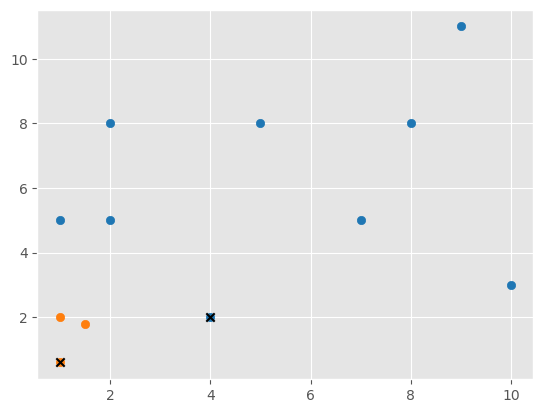

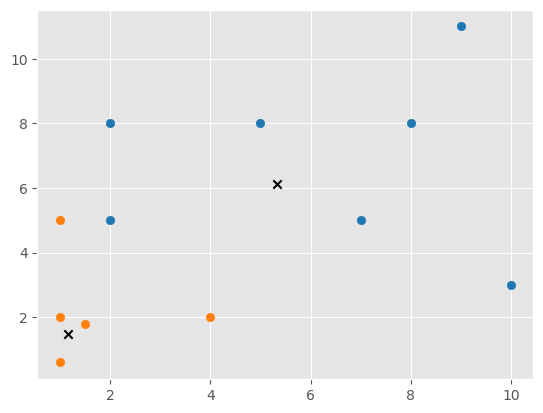

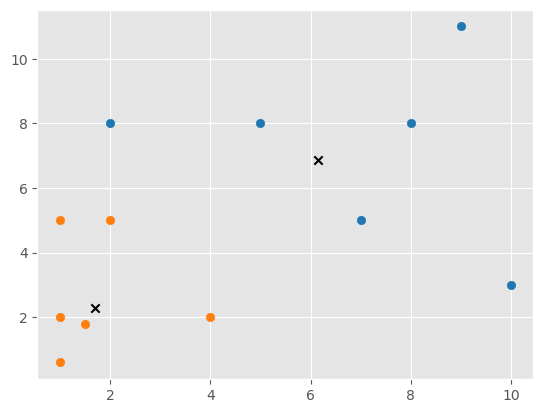

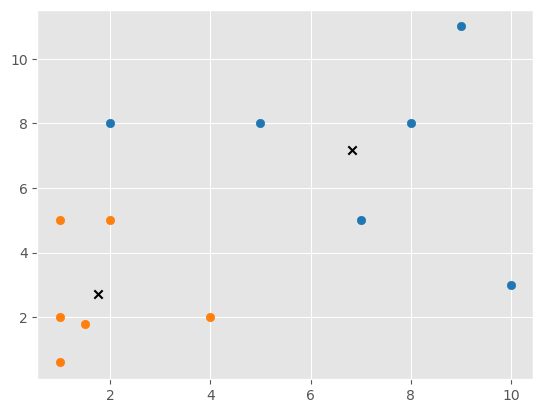

Break


In [11]:
model = Kmeans()
model.fit(X)